<a href="https://colab.research.google.com/github/hydra1664/OG-Linear-Regression/blob/main/Final_OG_Linear_Regression_from_Scratch_on_2_GB_Used_Car_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#In this mini project, **we will be training a Linear Regression model to perform accurate prediction of Price (Target Feature, $y$) of Used Cars, using the dataset of Used Cars having 25 Input Features ($X$) and 1 Target Feature of Price, available [here](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data).**

#In this dataset, we will be having **data of 426880 Cars, each having initially an Input Feature Vector of 25 Dimensions which is a Row Vector ($\vec{x}^i$) and a scalar Target Feature ($y_i$).**

#Let's download the data from Kaggle.

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aimlrl","key":"d4029d71ababd7f3d1cd6cf7a7a23db8"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!mv /content/kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

100% 262M/262M [00:02<00:00, 128MB/s]
100% 262M/262M [00:02<00:00, 92.5MB/s]


#Let's Unzip it.

In [ ]:
!unzip /content/craigslist-carstrucks-data.zip

Archive:  /content/craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

#Let's read the data.

In [ ]:
data = pd.read_csv("/content/vehicles.csv")

#Let's have a preliminary look on our data.

In [ ]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


#Let's see how many and what columns are there in our dataset.

In [ ]:
data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

#Let's see how many rows are there in our dataset.

In [ ]:
data.shape

(426880, 26)

###As we can see above that **each row of the dataset has the data of a single used car having 25 Dimensional input feature vector which is a row vector ($\vec{x}^i$) and a target feature (reference output or correct answer, $y_i$)**, making each row of the dataset as a 26 Dimensional row vector having 25 Dimensional Input feature row vector and a scalar target feature.

#Let's determine that whether any column of our dataset has missing values or not.

In [ ]:
data.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

###It can be observed above that **only some columns: ```id```, ```url```, ```region```, ```region_url```, ```price``` and ```state``` has no missing values** and rest all the other columns have missing values.  

###Before filling up the missing values, **let's remove or ```drop``` all the irrelevant columns which is expected to play no role** in making accurate prediction of Price of a used car.

In [ ]:
data.drop(labels=data.columns[0:4],axis=1,inplace=True)

In [ ]:
data.drop(labels="title_status",axis=1,inplace=True)

In [ ]:
data.drop(labels=data.columns[14:],axis=1,inplace=True)

In [ ]:
data.drop(labels="VIN",axis=1,inplace=True)

###Above, we can see that **we have removed or ```drop```ed the following columns: ```id```, ```url```, ```region```, ```region_url```, ```title_status```, ```VIN```, ```image_url```, ```description```, ```county```, ```state```, ```lat```, ```long``` and ```posting_date``` as these columns are expected to play no role in making accurate prediction** in the Price of a used car.

In [ ]:
data.shape

(426880, 13)

#**After removing or ```drop```ing** all the 13 irrelevant columns from the dataset, **we are left with only 13 columns in the dataset.**

In [ ]:
data.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color'],
      dtype='object')

###Now, our filtered dataset has only **13 relevant columns left which has a 12 Dimensional input feature row vector ($\vec{x}^i$) and a scalar target feature ($y_i$).**

#From this filtered dataset, **we are now going to remove or ```drop``` all the complete rows or complete data of all the used bikes for which the whole input feature row vector ($\vec{x}^i$) is ```numpy.nan``` or ```np.nan```**, that is at maximum 12 columns in those rows are missing (NaN or ```np.nan```).

In [ ]:
data.dropna(axis=0,thresh=12,inplace=True)

In [ ]:
data.isna().sum()

price               0
year                0
manufacturer     4059
model             975
condition       13570
cylinders        1766
fuel                0
odometer          408
transmission       11
drive            2491
size            36793
type             1893
paint_color      2856
dtype: int64

###After removing or ```drop```ing the rows, we are left with less number of missing values.

In [ ]:
data["odometer"].fillna(value=data["odometer"].mean(),inplace=True)

In [ ]:
data["condition"].fillna(value=data["condition"].value_counts().index[data["condition"].value_counts().argmax()],
                         inplace=True)

In [ ]:
data["paint_color"].fillna(value=data["paint_color"].value_counts().index[data["paint_color"].value_counts().argmax()],
                           inplace=True)

In [ ]:
data["transmission"].fillna(value=data["transmission"].value_counts().index[data["transmission"].value_counts().argmax()],
                           inplace=True)

In [ ]:
data["manufacturer"].fillna(value=data["manufacturer"].value_counts().index[data["manufacturer"].value_counts().argmax()],
                           inplace=True)

###As we can see above that, we have filled up missing values or **applied ```fillna``` function to fill missing values in the following columns: ```odometer```, ```condition```, ```paint_color```, ```transmission``` and ```manufacturer```.** In order to **fill up missing values in the ```odometer``` column, we have used the mean of values in that column because we are presuming that the data inside the column of ```odometer``` is Normally Distributed**, that is $\mathcal{N}(\mu_\text{odometer},\sigma^2)$ and the **missing values in the rest of columns are being filled up by the most frequently occurring values in those columns.**

#For **filling up the missing values in rest of the columns, we are going to use the Cross Tabulation Analysis because the values of these rest columns are dependent on other columns.**

#**Let's try to understand that what Cross Tabulation is?**

###In Cross Tabulation Analysis we create a Contingency Table, basically a table having rows and columns indexed by values of a different Single Feature or combination of values of two or more than two features present in the pandas dataframe.

###**Each cell** in this table, that is the **intersection of any column and row in the table has the count or frequency of occurrence of all the values used as index of a row as well as column of that specific cell jointly**, in the pandas dataframe. High Frequency implies High Relative Frequency which implies High Probability. Therefore, **using the Contingency table, we can easily determine that which values of different features are co-occuring most frequently or most probably and then we can use this information to fill up missing values.**

In [ ]:
crosstab_df_mdl_yr_mfc = pd.crosstab(data["model"],
 [data["year"],data["manufacturer"]],rownames=["model"],
                                     colnames=["year","manufacturer"])

###In the code snippet above, we have created a **Contingency table with rows as different Models of used cars and columns as different years as well as manufacturers of used cars, jointly.** Let's understand this with the help of an example.

In [ ]:
crosstab_df_mdl_yr_mfc

year          1900.0 1901.0    1905.0   1913.0      1918.0 1920.0 1923.0  \
manufacturer   acura   ford chevrolet cadillac ford   ford   ford   ford   
model                                                                      
"t"                0      0         0        0    1      0      0      0   
%                  0      0         0        0    0      0      0      0   
& altima           0      0         0        0    0      0      0      0   
'99 H1 Hummer      0      0         0        0    0      0      0      0   
(210)              0      0         0        0    0      0      0      0   
...              ...    ...       ...      ...  ...    ...    ...    ...   
zl1 camaro         0      0         0        0    0      0      0      0   
zr2 sonoma         0      0         0        0    0      0      0      0   
zx2                0      0         0        0    0      0      0      0   
♿                  0      0         0        0    0      0      0      0   
♿ vmi              0      0         0        0    0      0      0      0   

year          1924.0       ... 2021.0                                       \
manufacturer   dodge ford  ...    ram rover subaru toyota volkswagen volvo   
model                      ...                                               
"t"                0    0  ...      0     0      0      0          0     0   
%                  0    0  ...      0     0      0      0          0     0   
& altima           0    0  ...      0     0      0      0          0     0   
'99 H1 Hummer      0    0  ...      0     0      0      0          0     0   
(210)              0    0  ...      0     0      0      0          0     0   
...              ...  ...  ...    ...   ...    ...    ...        ...   ...   
zl1 camaro         0    0  ...      0     0      0      0          0     0   
zr2 sonoma         0    0  ...      0     0      0      0          0     0   
zx2                0    0  ...      0     0      0      0          0     0   
♿                  0    0  ...      0     0      0      0          0     0   
♿ vmi              0    0  ...      0     0      0      0          0     0   

year             2022.0                         
manufacturer  chevrolet ford mitsubishi toyota  
model                                           
"t"                   0    0          0      0  
%                     0    0          0      0  
& altima              0    0          0      0  
'99 H1 Hummer         0    0          0      0  
(210)                 0    0          0      0  
...                 ...  ...        ...    ...  
zl1 camaro            0    0          0      0  
zr2 sonoma            0    0          0      0  
zx2                   0    0          0      0  
♿                     0    0          0      0  
♿ vmi                 0    0          0      0  

[14487 rows x 1708 columns]

#Each entry in a cell shows a Frequency or Count, as shown above.

#**Let's try to determine that ```if (data["year"] == 2022) and (data["manufacturer"] == "toyota")``` then what will be the most probable or most frequent ```model```.**

In [ ]:
crosstab_df_mdl_yr_mfc.columns[-1]

(2022.0, 'toyota')

#**Let's first try to determine the Frequency Distribution over different ```model```s based on the condition that ```(data["year"] == 2022) and (data["manufacturer"] == "toyota")```.**  

#**In mathematical terms, we are trying to determine $F($ ```model```|(```year = 2022``` $\cap$ ```manufacturer = "toyota"```)$)$**

#**And the frequency distribution, $F($ ```model```|(```year = 2022``` $\cap$ ```manufacturer = "toyota"```)$)$ is:**

In [ ]:
freq_dist = crosstab_df_mdl_yr_mfc[crosstab_df_mdl_yr_mfc.columns[-1]]

In [ ]:
freq_dist

model
"t"              0
%                0
& altima         0
'99 H1 Hummer    0
(210)            0
                ..
zl1 camaro       0
zr2 sonoma       0
zx2              0
♿                0
♿ vmi            0
Name: (2022.0, toyota), Length: 14487, dtype: int64

###Now, let's try to determine that **out of all the models, which model has got the highest frequency or most frequent or most probable.**

In [ ]:
freq_dist.index[freq_dist.argmax()]

'mighty max'

###Therefore, we can conclude that, **$F($ ```model = "mighty max"```|(```year = 2022``` $\cap$ ```manufacturer = "toyota"```)$)$ is highest among all the other Frequencies.** Therefore, **everytime in our data whenever in any row, ```(year == 2022) and (manufacturer == "toyota")``` and if missing value is there in the ```model``` of that row then we are going to fill up that missing value with ```"mighty max"```.**

###**Note:** Actually we are computing $F($ ```model = "mighty max"``` $\cap$ ```year = 2022``` $\cap$ ```manufacturer = "toyota"```$)$ instead of computing $F($ ```model = "mighty max"```|(```year = 2022``` $\cap$ ```manufacturer = "toyota"```)$)$ because from the equation of Conditional Probability, we know that:

\begin{equation}
P(A|B) = \frac{P(A \cap B)}{P(B)}
\end{equation}

###Following on the same definition of the Conditional Probability, we can say that:

#$P(\text{model} | \text{year} \cap \text{manufacturer}) = \frac{P(\text{model} \cap \text{year} \cap \text{manufacturer})}{P(\text{year} \cap \text{manufacturer})}$

###But the fact is that, **$P(\text{year} \cap \text{manufacturer})$ remains constant** and therefore:

$P(\text{model} | \text{year} \cap \text{manufacturer}) ∝ P(\text{model} \cap \text{year} \cap \text{manufacturer})$

#OR

$F(\text{model} | \text{year} \cap \text{manufacturer}) ∝ F(\text{model} \cap \text{year} \cap \text{manufacturer})$

###**Therefore, whether we compute the highest $F(\text{model} | \text{year} \cap \text{manufacturer})$ or $F(\text{model} \cap \text{year} \cap \text{manufacturer})$, it's the same thing, we will get the same value of ```model``` for ```year``` $\cap$ ```manufacturer```.**

###**And, it's easier to compute $F(\text{model} \cap \text{year} \cap \text{manufacturer})$ rather than computing $F(\text{model} | \text{year} \cap \text{manufacturer})$, therefore we decided to compute $F(\text{model} \cap \text{year} \cap \text{manufacturer})$**

###In a similar way **we can determine the highest occurring ```model``` for the combination of each ```year``` as well as ```manufacturer```, that is ```(year``` $\cap$ ```manufacturer)```**

In [ ]:
mapping_dict = dict()

for single_col in crosstab_df_mdl_yr_mfc.columns:
  mapping_dict[single_col] = crosstab_df_mdl_yr_mfc[single_col].index[crosstab_df_mdl_yr_mfc[single_col].argmax()]

#The code snippet above is actually maintaining the dictionary of most frequent occuring ```model``` for ```(year``` $\cap$ ```manufacturer)```

In [ ]:
for k in mapping_dict.keys():
  boolean_mask = (data["year"] == k[0]) & (data["manufacturer"] == k[1])
  data.loc[boolean_mask,"model"] = data.loc[boolean_mask,"model"].fillna(value=mapping_dict[k],inplace=False)

#The code snippet above is using the dictionary maintained to fill up the missing values in the rows having specific ```year``` as well as ```manufacturer```.

In [ ]:
data["model"].fillna(value=data["model"].value_counts().index[data["model"].value_counts().argmax()],
                           inplace=True)

#Even after filling up missing values using the dictionary, **still some missing values are left and therefore we are simply going to fill up them with the most frequently occurring ```model``` irrespective of ```(year``` $\cap$ ```manufacturer)```**

In [ ]:
data["cylinders"].fillna(value=data["cylinders"].value_counts().index[data["cylinders"].value_counts().argmax()],
                           inplace=True)

#As the **values in ```cylinder``` column usually doesn't depends upon the values in any other column and therefore, we are not going to create any kind of contingency table in this case** and simply fill up all the missing values with the most frequently occurring value.

In [ ]:
crosstab_df_type_mfc = pd.crosstab(data["type"],
                                       data["manufacturer"],rownames=["type"],
                                     colnames=["manufacturer"])

In [ ]:
mapping_dict = dict()

for single_col in crosstab_df_type_mfc.columns:
  mapping_dict[single_col] = crosstab_df_type_mfc[single_col].index[crosstab_df_type_mfc[single_col].argmax()]

In [ ]:
for k in mapping_dict.keys():
  boolean_mask = (data["manufacturer"] == k)
  data.loc[boolean_mask,"type"] = data.loc[boolean_mask,"type"].fillna(value=mapping_dict[k],inplace=False)

In [ ]:
crosstab_df_drive_mfc_mdl = pd.crosstab(data["drive"],
                                       [data["manufacturer"], data["model"]],rownames=["drive"],
                                     colnames=["manufacturer","model"])

In [ ]:
mapping_dict = dict()

for single_col in crosstab_df_drive_mfc_mdl.columns:
  mapping_dict[single_col] = crosstab_df_drive_mfc_mdl[single_col].index[crosstab_df_drive_mfc_mdl[single_col].argmax()]

In [ ]:
for k in mapping_dict.keys():
  boolean_mask = (data["manufacturer"] == k[0]) & (data["model"] == k[1])
  data.loc[boolean_mask,"drive"] = data.loc[boolean_mask,"drive"].fillna(value=mapping_dict[k],inplace=False)

In [ ]:
data["drive"].fillna(value=data["drive"].value_counts().index[data["drive"].value_counts().argmax()],
                           inplace=True)

In [ ]:
crosstab_df_size_mfc_mdl = pd.crosstab(data["size"],
                                       [data["manufacturer"], data["model"]],rownames=["size"],
                                     colnames=["manufacturer","model"])

In [ ]:
mapping_dict = dict()

for single_col in crosstab_df_size_mfc_mdl.columns:
  mapping_dict[single_col] = crosstab_df_size_mfc_mdl[single_col].index[crosstab_df_size_mfc_mdl[single_col].argmax()]

In [ ]:
for k in mapping_dict.keys():
  boolean_mask = (data["manufacturer"] == k[0]) & (data["model"] == k[1])
  data.loc[boolean_mask,"size"] = data.loc[boolean_mask,"size"].fillna(value=mapping_dict[k],inplace=False)

In [ ]:
data["size"].fillna(value=data["size"].value_counts().index[data["size"].value_counts().argmax()],
                           inplace=True)

###In the code snippets above, **we are filling up the missing values in:**

1. ```type``` column based on ```manufacturer``` by creating their contingency table.

2. ```drive``` column based on ```(manufacturer``` $\cap$ ```model)``` by creating their contingency table.

3. ```size``` column based on ```(manufacturer``` $\cap$ ```model)``` by creating their contingency table.

In [ ]:
data.isna().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

#As we can see above that we are not left with any missing values in any column.

#Finally, let's write the cleaned data into another ```.csv``` file **so that for training the Linear Regression model, we can directly read this file, ignoring to repeat all the above steps which we did before to clean the data.**

In [ ]:
data.to_csv("/content/cleaned_vehicles.csv")

#Now, **let's copy this file to the google drive** so that it can be retained anytime whenever needed.

In [ ]:
!cp /content/cleaned_vehicles.csv /content/drive/MyDrive/

##Let's copy the file of the cleaned data from google drive back into the local drive and **encode categorical values either into integers or One Hot Encoding.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
!cp /content/drive/MyDrive/cleaned_vehicles.csv /content

In [ ]:
data = pd.read_csv("/content/cleaned_vehicles (1).csv")

In [ ]:
data = data.iloc[:,1:]

In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black
1,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,other,4wd,full-size,pickup,black
2,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,other,4wd,full-size,pickup,silver
3,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,automatic,4wd,mid-size,truck,grey
4,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,other,4wd,mid-size,pickup,red


In [ ]:
data.shape

(144017, 13)

#As we can see that now the cleaned data has the data of 144017 Used cars.

#**Let's determine which columns are Categorical so that we can encode them into Integer or One Hot Encoded Values.**

In [ ]:
categorical_columns = list()

for single_column in data.columns:

  if data[single_column].dtype == "object":
    categorical_columns.append(single_column)

In [ ]:
print(categorical_columns)

['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type', 'paint_color']


###Let's first encode the categorical values of **all those columns which are Ordinal or their values have some Order associated with them and hence they can be compared**, such as the column of ```cylinders``` which can be compared such as ```3 cylinders``` or ```4 cylinders```. So, the following columns are Ordinal:

###```condition```
###```cylinders```
###```transmission```
###```drive```
###```size```

###Rest of the columns are Nominal.

##Therefore, **categorical columns are of two types: Nominal (having no order associated with their values) as well as Ordinal (having some order associated with them).**


#**Let's encode the values of Ordinal Columns now.**

###But, first let us determine that what are the unique values available in all the Ordinal Columns.

In [ ]:
for single_column in ["condition","cylinders","transmission","drive","size"]:

  print("The unique values in {} column are {}".format(single_column,
                                                       data[single_column].unique()))

The unique values in condition column are ['excellent' 'good' 'like new' 'new' 'fair' 'salvage']
The unique values in cylinders column are ['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '10 cylinders'
 '3 cylinders' 'other' '12 cylinders']
The unique values in transmission column are ['automatic' 'other' 'manual']
The unique values in drive column are ['rwd' '4wd' 'fwd']
The unique values in size column are ['full-size' 'mid-size' 'compact' 'sub-compact']


###Let's create the dictionary of mappings for all the categorical values to Integers, in all the Ordinal Columns.

In [ ]:
condition_encoding_dict = {'excellent':6, 'good':3, 'like new':4, 'new':5, 'fair':2, 'salvage':1}
cylinders_encoding_dict = {'6 cylinders':6, '8 cylinders':8, '4 cylinders':4, '5 cylinders':5,
                           '10 cylinders':10, '3 cylinders':3, 'other':7, '12 cylinders':12}
transmission_encoding_dict = {'automatic':3, 'other':2, 'manual':1}
drive_encoding_dict = {'rwd':2, '4wd':3, 'fwd':1}
size_encoding_dict = {'full-size':4, 'mid-size':3, 'compact':1, 'sub-compact':2}

###Let's replace all the categorical values in all the Ordinal columns, with their respective integer mappings.

In [ ]:
data["condition"].replace(to_replace=condition_encoding_dict.keys(),
                          value=condition_encoding_dict.values(),inplace=True)

data["cylinders"].replace(to_replace=cylinders_encoding_dict.keys(),
                          value=cylinders_encoding_dict.values(),inplace=True)

data["transmission"].replace(to_replace=transmission_encoding_dict.keys(),
                             value=transmission_encoding_dict.values(),inplace=True)

data["drive"].replace(to_replace=drive_encoding_dict.keys(),
                      value=drive_encoding_dict.values(),inplace=True)

data["size"].replace(to_replace=size_encoding_dict.keys(),
                     value=size_encoding_dict.values(),inplace=True)

#**Let's now encode all the Nominal Columns with the help of One Hot Encoding.**

###Let's first that see how many unique values are there in each of the Nominal Columns.

In [ ]:
for single_column in ["manufacturer","model","fuel","type","paint_color"]:

  print("The number of unique values in {} column are {}".format(single_column,
                                                       data[single_column].unique().shape[0]))

The number of unique values in manufacturer column are 41
The number of unique values in model column are 14487
The number of unique values in fuel column are 5
The number of unique values in type column are 13
The number of unique values in paint_color column are 12


###**As all the Nominal columns except, ```model``` have very less number of unique values so we can One Hot Encode all the values of rest of the columns.**

###Let's see what can we do with the values of ```model``` column.

###**Let's first encode all the unique values in the ```model``` column and visualize the frequency distribution of the integer values in ```model``` column.**

In [ ]:
data["model"].replace(to_replace=data["model"].unique(),
                      value=list(range(data["model"].unique().shape[0])),
                      inplace=True)

In [ ]:
data.to_csv("/content/drive/MyDrive/new1.csv",index=False)

NameError: name 'data' is not defined

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = pd.read_csv("/content/new1.csv")

Text(0, 0.5, 'Frequency of Integer Labels')

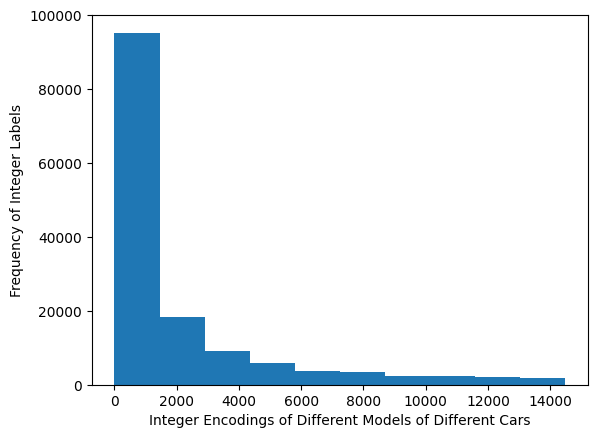

In [ ]:
plt.hist(data["model"])
plt.xlabel("Integer Encodings of Different Models of Different Cars")
plt.ylabel("Frequency of Integer Labels")

##As can be visualized that **all the integer mappings roughly below 2000 are occupying majority of the area under the Frequency Distribution** and thats the piece of information which we are going to use **to determine the various integer mappings that need to be One Hot Encoded and rest of the Integer mappings will be merged into a single integer mapping.**   

##**We will One Hot Encode only those top 'k' (Top 'k' most frequently occuring)Integer mappings seperately which are contributing to majority (let's say 70%) of the area under the curve of Frequency Distribution and merge rest of them into a single integer value.**

In [4]:
models_freq_dist = dict(data["model"].value_counts())

##And the best part is that all the integer mappings we computed above are by default arranged in descending order according to their frequencies and **we simply have to get the list of all the integer mappings whose frequencies when summed up are contributing to 70% of the area under the Frequency Distribution.**

In [5]:
area_cut_off = 0.8
top_models = list()
total_area = 0
total_frequency = data.shape[0]

for k,v in models_freq_dist.items():

  if (total_area/total_frequency) > area_cut_off:
    break

  top_models.append(k)

  total_area += models_freq_dist[k]

Text(0, 0.5, 'Frequency of Integer Labels')

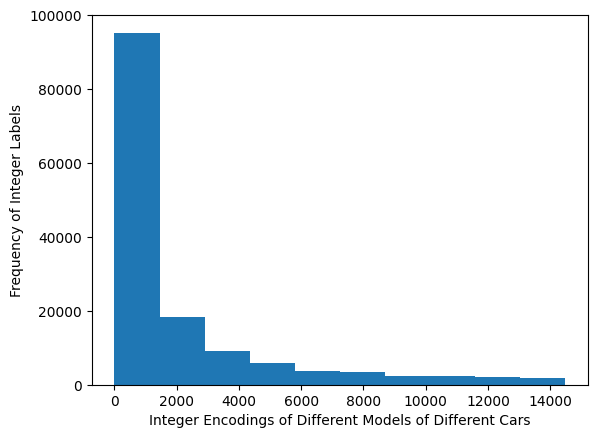

In [ ]:
plt.hist(data["model"])
plt.xlabel("Integer Encodings of Different Models of Different Cars")
plt.ylabel("Frequency of Integer Labels")

In [6]:
k = len(top_models)
print(k)

1555


##**Therefore, it can be said that there are 773 top most frequently occurring models whose frequencies when summed up contribute to 70% of the area under the Frequency Distribution.**  

##Let's assign a unique integer value to each of the integer mappings till index 772 (k-1) and then after that because we need to merge all the integer mappings, assign the index 773 to all of them.

In [7]:
model_counts = data['model'].value_counts()

counts_df = pd.DataFrame(model_counts).reset_index()

counts_df.columns = ['model', 'count']

# Sort the DataFrame by the count column in descending order
sorted_df = counts_df.sort_values(by='count', ascending=False)

In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,ford,0,6,6,gas,128000.0,3,2,4,truck,black
1,27990,2012.0,gmc,1,3,8,gas,68696.0,2,3,4,pickup,black
2,34590,2016.0,chevrolet,2,3,6,gas,29499.0,2,3,4,pickup,silver
3,35000,2019.0,toyota,3,6,6,gas,43000.0,3,3,3,truck,grey
4,29990,2016.0,chevrolet,4,3,6,gas,17302.0,2,3,3,pickup,red


In [8]:
updated_mapping_dict = dict()

for i,item in enumerate(models_freq_dist.items()):

  if i <= (k-1):
    updated_mapping_dict[item[0]] = i
  else:
    updated_mapping_dict[item[0]] = k

In [9]:
data["model"].replace(to_replace=updated_mapping_dict.keys(),
                       value=updated_mapping_dict.values(),inplace=True)

Text(0, 0.5, 'Frequency of Integer Labels')

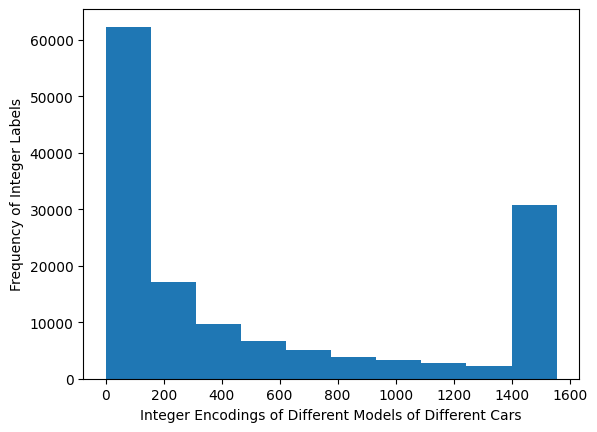

In [10]:
plt.hist(data["model"])
plt.xlabel("Integer Encodings of Different Models of Different Cars")
plt.ylabel("Frequency of Integer Labels")

In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,ford,131,6,6,gas,128000.0,3,2,4,truck,black
1,27990,2012.0,gmc,165,3,8,gas,68696.0,2,3,4,pickup,black
2,34590,2016.0,chevrolet,66,3,6,gas,29499.0,2,3,4,pickup,silver
3,35000,2019.0,toyota,6,6,6,gas,43000.0,3,3,3,truck,grey
4,29990,2016.0,chevrolet,88,3,6,gas,17302.0,2,3,3,pickup,red


##Let's finally concatenate the 774 columns of One Hot Encodings of integer mappings available in ```model``` column. For that let's create a function which will serve as a generic function for One Hot Encoding the integer mappings in rest of the columns too.

In [11]:
def convert_to_ohe_df(column_name):

  model_unique_values = data[column_name].unique().shape[0]
  identity_matrix = np.eye(model_unique_values,model_unique_values)
  ohe_models = identity_matrix[data[column_name]]
  df_column_names = [column_name+str(i) for i in range(model_unique_values)]
  column_df = pd.DataFrame(data=ohe_models,columns=df_column_names)

  return column_df

##Let's Integer Encode remaining columns so that we can One Hot Encode them.

In [12]:
for single_column in ["manufacturer","fuel","type","paint_color"]:

  column_unique_values = data[single_column].unique()
  data[single_column].replace(to_replace=column_unique_values,
                              value=list(range(column_unique_values.shape[0])),
                              inplace=True)

In [ ]:
data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,15000,2013.0,0,131,6,6,0,128000.0,3,2,4,0,0
1,27990,2012.0,1,165,3,8,0,68696.0,2,3,4,1,0
2,34590,2016.0,2,66,3,6,0,29499.0,2,3,4,1,1
3,35000,2019.0,3,6,6,6,0,43000.0,3,3,3,0,2
4,29990,2016.0,2,88,3,6,0,17302.0,2,3,3,1,3


In [13]:
for single_column in ["manufacturer","model","fuel","type","paint_color"]:

  column_df = convert_to_ohe_df(single_column)
  data.drop(labels=single_column,axis=1,inplace=True)
  data = pd.concat([data,column_df],axis=1)

In [ ]:
data.head()

,price,year,condition,cylinders,odometer,transmission,drive,size,manufacturer0,manufacturer1,...,paint_color2,paint_color3,paint_color4,paint_color5,paint_color6,paint_color7,paint_color8,paint_color9,paint_color10,paint_color11
0,15000,2013.0,6,6,128000.0,3,2,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27990,2012.0,3,8,68696.0,2,3,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34590,2016.0,3,6,29499.0,2,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35000,2019.0,6,6,43000.0,3,3,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29990,2016.0,3,6,17302.0,2,3,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##**Let's also transform the ```year``` column of the pandas dataframe into something which represents how much old the car is by subtracting year of the oldest car in the dataset from the year of each car** or by subtracting the year when the first commercial car was introduced, that is 1886.

In [14]:
data["year"] = 2024- data["year"]

In [ ]:

data.head()

,price,year,condition,cylinders,odometer,transmission,drive,size,manufacturer0,manufacturer1,...,paint_color2,paint_color3,paint_color4,paint_color5,paint_color6,paint_color7,paint_color8,paint_color9,paint_color10,paint_color11
0,15000,11.0,6,6,128000.0,3,2,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27990,12.0,3,8,68696.0,2,3,4,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34590,8.0,3,6,29499.0,2,3,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35000,5.0,6,6,43000.0,3,3,3,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29990,8.0,3,6,17302.0,2,3,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.to_csv("/content/updated_cleaned_final.csv",index=False)

In [ ]:
!cp /content/updated_cleaned_vehicles.csv /content/drive/MyDrive/

cp: cannot stat '/content/updated_cleaned_vehicles.csv': No such file or directory


In [ ]:
!cp /content/drive/MyDrive/updated_cleaned_vehicles.csv /content/

cp: cannot stat '/content/drive/MyDrive/updated_cleaned_vehicles.csv': No such file or directory


##Let's filter out those input feature columns which have high pearson correlation with the ```price``` column.  

In [ ]:
data = pd.read_csv("/content/updated_cleaned_final.csv")

In [ ]:
"""
pearson_corr = list()

for single_column in data.columns:
  pearson_corr.append(data["price"].corr(data[single_column]))

relevant_columns_idx = np.argwhere(np.abs(np.array(pearson_corr))>10**(-2))
"""

In [ ]:
"""
relevant_columns_idx[:,0]

"""

In [ ]:
'''
data = data.iloc[:,relevant_columns_idx[:,0]]
'''

In [ ]:
data.head()

In [15]:
def apply_pca(X,preserved_variance_percentage):

  unprojected_X = np.array(X)
  X_cov = np.array(X.cov())
  Q_lambda_QT = np.linalg.svd(X_cov)
  total_variance = np.sum(Q_lambda_QT[1])
  variance_sum = 0
  num_eigen_vectors = 1

  if preserved_variance_percentage == 1:
    projected_X = np.matmul(unprojected_X,Q_lambda_QT[0])
    projected_X = pd.DataFrame(data=projected_X,
                             columns=["feature_"+str(i) for i in range(X.shape[1])])
  else:
    for variance in Q_lambda_QT[1]:

      if (variance_sum/total_variance) > preserved_variance_percentage:
        break

      variance_sum += variance
      num_eigen_vectors += 1

    projected_X = np.matmul(unprojected_X,Q_lambda_QT[0][:,0:num_eigen_vectors])

    projected_X = pd.DataFrame(data=projected_X,
                             columns=["feature_"+str(i) for i in range(num_eigen_vectors)])

  return projected_X

In [16]:
projected_X = apply_pca(data.iloc[:,1:],0.99)

In [ ]:
projected_X.head()

In [17]:
projected_X = (projected_X - projected_X.mean())/projected_X.std()

In [18]:
projected_data = pd.concat([projected_X,data["price"]],axis=1)

<Figure size 4000x4000 with 0 Axes>

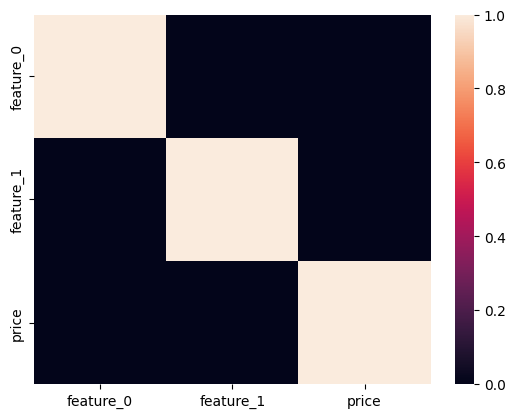

<Figure size 4000x4000 with 0 Axes>

In [19]:
sns.heatmap(projected_data.corr(),xticklabels=True,yticklabels=True)
plt.figure(figsize=(40,40))

##Now, we are going to split this data into Training and Testing Data with 70 % of the rows in Training Data and remaining 30 % in the Testing Data. Therefore, $N_\text{train} = 0.7 \times 144017 = 100811$ and $N_\text{test} = (144017 - 100811) = 43206$

In [20]:
training_data_len = int(0.7 * projected_data.shape[0])
training_data = projected_data.iloc[0:training_data_len,:]

testing_data = projected_data.iloc[training_data_len:,:]

In [ ]:
training_data.shape

In [ ]:
testing_data.shape

In [ ]:
training_data.head()

In [21]:
X_train_transpose = np.array(training_data.iloc[:,0:projected_data.shape[1]-1])
y_train = np.array(training_data["price"]).reshape(-1,1)

X_test_transpose = np.array(testing_data.iloc[:,0:projected_data.shape[1]-1])
y_test = np.array(testing_data["price"]).reshape(-1,1)

In [ ]:
X_train_transpose.shape

In [ ]:
X_train_transpose

##The dataset has finally the following Input Features:

##$1.$ **```manufacturer3```** $(x_1)$
##$2.$ **```model30```** $(x_2)$
##$3.$ **```model31```** $(x_3)$

#The Input feature row vector of any $i^{th}$ row of the data in this case is given as:
#\begin{equation}
\vec{x}^i =
\begin{bmatrix}
x_1^i \cdots x_j^i \cdots x_{3}^i
\end{bmatrix}
\end{equation}

#Therefore,
#\begin{equation}
X_\text{train}^T =
\begin{bmatrix}
\longleftarrow \vec{x}^1 \longrightarrow \\
\vdots \\
x_1^i \cdots x_j^i \cdots x_{3}^i \\
\vdots \\
\longleftarrow \vec{x}^{N_\text{train}} \longrightarrow
\end{bmatrix}
\end{equation}




In [ ]:
y_train.shape

#And,
#\begin{equation}
\begin{bmatrix}
y_1 \\
\vdots \\
y_i \\
\vdots \\
y_{N_\text{train}}
\end{bmatrix}
\end{equation}

#Now, we will be **training a Linear Regression Model on our training data using Gradient Descent Algorithm** using the following update in a **while or for loop until this update rule converges to the Minima of the $MSE$, that is $(\theta_0^*, \vec{\theta}^*)$** also known as Loss Function:

#\begin{equation}
\theta_{final} = \theta_{initial} - \epsilon \cdot \frac{\partial MSE}{\partial \theta}
\end{equation}

#Where,
$\frac{\partial MSE}{\partial \theta_0}$


In [22]:
N_train = y_train.shape[0]

In [23]:
def del_by_del_thetas(theta_0,theta):

  y_pred = (theta_0 + np.matmul(X_train_transpose,theta))
  error_vector_transpose = np.transpose(y_pred - y_train)

  del_by_del_theta = (2/N_train)*np.transpose(np.matmul(error_vector_transpose,
                                                        X_train_transpose))
  del_by_del_theta_0 = (2/N_train)*np.sum(error_vector_transpose)

  return [del_by_del_theta_0,del_by_del_theta]

In [24]:
def mae(theta_0,theta):

  y_pred = (theta_0 + np.matmul(X_train_transpose,theta))
  abs_error_vector = np.abs(y_pred - y_train)

  return np.mean(abs_error_vector)

#Now, Finally we are going **train Linear Regression Model using Gradient Descent Algorithm.**

In [62]:
epsilon = 10**(-5.4)
tol = 10**(-6)
#theta_0_initial = np.random.randn(1,)[0]
theta_0_initial = -1
theta_initial = np.zeros((X_train_transpose.shape[1],1))
iteration = 0

while True:

  initial_gradients = del_by_del_thetas(theta_0_initial,
                                        theta_initial)

  theta_0_final = theta_0_initial - (epsilon * initial_gradients[0])
  theta_final = theta_initial - (epsilon * initial_gradients[1])

  initial_gradient_vector = np.concatenate((np.array([[initial_gradients[0]]]),
                                           initial_gradients[1]))

  initial_mae = mae(theta_0_initial,theta_initial)
  final_mae = mae(theta_0_final,theta_final)

  if abs(initial_mae - final_mae) < tol:
    break

  initial_mae = mae(theta_0_initial,theta_initial)

  print("The Value of MAE at iteration # {} is {}".format(iteration,initial_mae))

  theta_0_initial = theta_0_final
  theta_initial = theta_final

  iteration += 1

Streaming output truncated to the last 5000 lines.
The Value of MAE at iteration # 44593 is 26403.24980643456
The Value of MAE at iteration # 44594 is 26403.245203791204
The Value of MAE at iteration # 44595 is 26403.240601179223
The Value of MAE at iteration # 44596 is 26403.23600805637
The Value of MAE at iteration # 44597 is 26403.231429246403
The Value of MAE at iteration # 44598 is 26403.226851718333
The Value of MAE at iteration # 44599 is 26403.22227612205
The Value of MAE at iteration # 44600 is 26403.21770055692
The Value of MAE at iteration # 44601 is 26403.21312571019
The Value of MAE at iteration # 44602 is 26403.2085540457
The Value of MAE at iteration # 44603 is 26403.203985204073
The Value of MAE at iteration # 44604 is 26403.199421504487
The Value of MAE at iteration # 44605 is 26403.194866139693
The Value of MAE at iteration # 44606 is 26403.190314228348
The Value of MAE at iteration # 44607 is 26403.185763033838
The Value of MAE at iteration # 44608 is 26403.181216814

KeyboardInterrupt: 